Q1. Explain the concept of batch normalization in the context of Artificial Neural Networks

In neural networks, we have layers of neurons, and we want them to work well together. But sometimes, the neurons in one layer might get too big or too small, making it hard for the network to learn effectively. Batch normalization helps solve this problem.

how it works:

1. Baking in Batches: Just like you work with batches of cookie dough, in batch normalization, we take small groups (batches) of data within our training set.

2. Adjusting Each Batch: For each batch, we calculate the average and standard deviation of the data. These are like measuring the average size and variation in your cookie batch.

3. Scaling and Shifting: Now, we adjust the data in each batch. If some values in a batch are too large, we make them smaller, and if they're too small, we make them larger. This ensures that the neurons don't become too extreme in their activations.

4. Consistent Baking: Batch normalization makes sure that the neurons in each layer are consistent in how they respond. This helps the network train faster and generalize better to new data.

Q2. Describe the benefits of using batch normalization during training.

Using batch normalization during training offers several benefits in simple terms:

1. Faster Training: Batch normalization makes training neural networks faster because it helps the network learn important patterns more quickly. It's like giving the network a better map to find the right answers faster.

2. Stable Learning: It keeps the values inside the network at reasonable levels, preventing them from becoming too big or too small. Think of it as keeping your cooking ingredients in the right proportions for a recipe to turn out well.

3. Allows for Larger Networks: Without batch normalization, it's hard to train very deep neural networks. Batch normalization makes it easier to build big and powerful networks that can handle complex tasks.

4. Improved Generalization: The network becomes better at understanding and predicting new, unseen data because it's learned to be more consistent and adaptive. It's like a student who's learned the concept behind math problems rather than memorizing solutions.

5. Reduced Sensitivity to Hyperparameters: It makes the training process less sensitive to choosing the right settings, which can be tricky in neural networks. It's like making your recipe forgiving of small mistakes, so you're more likely to get tasty cookies even if you make a slight error.

Q3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.

Batch normalization (BatchNorm) is a technique used in deep neural networks to stabilize and improve the training process. Its working principle involves two main steps: normalization and the introduction of learnable parameters.

Normalization Step:
The normalization step in batch normalization aims to standardize the inputs to a neural network layer within each mini-batch of data during training. Here's how it works:

1. Compute Batch Statistics: For each mini-batch of data during training, BatchNorm calculates two statistics: the mean (average) and the standard deviation of the activations (output values) across the entire mini-batch. These statistics are computed independently for each feature (or neuron) within the layer.

2. Normalize Activations: Once the batch statistics are computed, the activations within the mini-batch are normalized by subtracting the mean and dividing by the standard deviation. This centers the activations around zero and scales them to have a standard deviation of approximately 1. The formula for normalization is:
normalized_activation = (activation - mean) / sqrt(variance + epsilon)

 epsilon is a small constant added to the denominator for numerical stability.

3. Scaling and Shifting: After normalization, the normalized activations are scaled by a learnable parameter called gamma and shifted by another learnable parameter called beta. These parameters allow the network to adaptively adjust the activations if needed. The final normalized activation is computed as:
output = gamma * normalized_activation + beta


1. chose a dataset of your choice(eg. MNIST, CIFAR 10) AND preprocess it

In [45]:
# load cifar10 dataset

In [46]:
import tensorflow as tf
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = mnist.load_data()

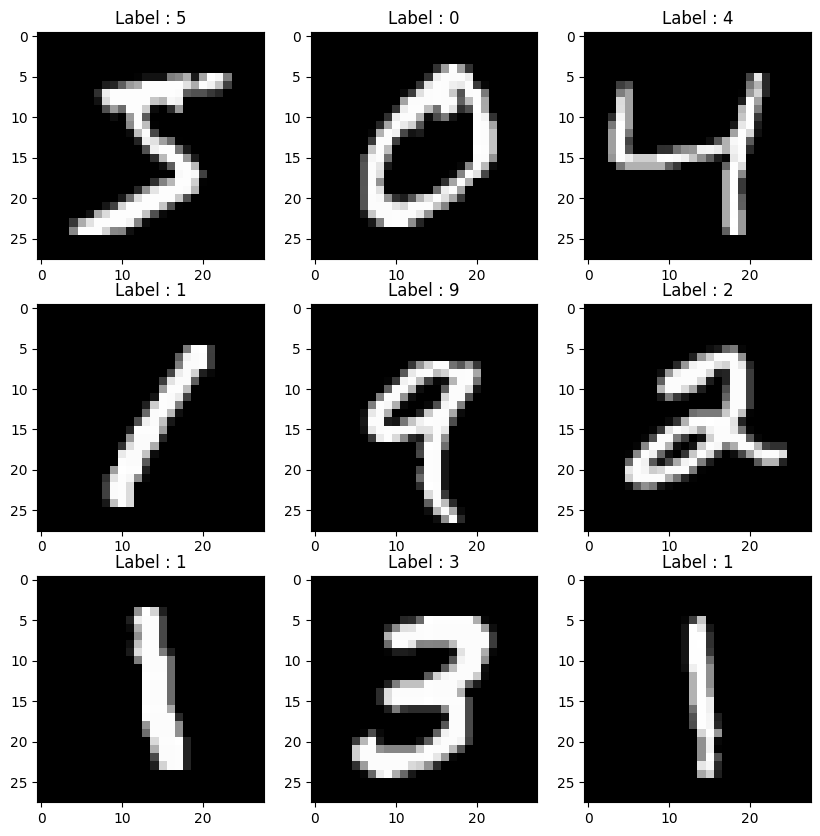

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title(f'Label : {y_train[i]}')
plt.show()

In [48]:
# scaling the x features
x_train = x_train/255
x_test = x_test/255

In [49]:
# Converting Y features to categorical
from keras.utils import to_categorical
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [50]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [51]:
y_test[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Q.2 Implemnet a simple feedforward neural network using any deep learning framework /library(eg.tensorflor, pyTourch)

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [53]:
# Define the model
model = Sequential()

# Adding a simple flatten layer
model.add(Flatten(input_shape=(28,28,1)))

# Adding Dense Layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32,activation='relu'))

# Output layer
model.add(Dense(10,activation='softmax'))

In [54]:
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [55]:
# Model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Q.3 Train the neural network on the chosen dataset without using batch normalization.

In [56]:
hist1 = model.fit(x_train,y_train,validation_split=0.2,epochs=30)

Epoch 1/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3262 - accuracy: 0.9076 - val_loss: 0.1744 - val_accuracy: 0.9485
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1408 - accuracy: 0.9579 - val_loss: 0.1284 - val_accuracy: 0.9635
Epoch 3/30
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1016 - accuracy: 0.9697 - val_loss: 0.1198 - val_accuracy: 0.9661
Epoch 4/30
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0805 - accuracy: 0.9755 - val_loss: 0.1100 - val_accuracy: 0.9678
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0663 - accuracy: 0.9800 - val_loss: 0.1192 - val_accuracy: 0.9678
Epoch 6/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0562 - accuracy: 0.9821 - val_loss: 0.1066 - val_accuracy: 0.9688
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0462 - accuracy: 0.9858 - val_loss: 0.1030 - val_accurac

In [57]:
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0413 - accuracy: 0.9928


[0.0413026288151741, 0.9927666783332825]

In [58]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1521 - accuracy: 0.9732


[0.15206106007099152, 0.9732000231742859]

Q.4 Implement batch normalization layers in the neural netwrok and train the models with and wihout batch normalization

In [59]:
from keras.layers import BatchNormalization

In [60]:
model2 = Sequential()

# Flatten Layer
model2.add(Flatten(input_shape=(28,28,1)))

# Dense layers with batch normalization
model2.add(Dense(64,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu'))
model2.add(BatchNormalization())

# Output layer
model2.add(Dense(10,activation='softmax'))

In [61]:
# compileing the model
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
# summary of model2
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_14 (Dense)            (None, 10)               

In [63]:
# traing the model
hist2 = model2.fit(x_train,y_train,validation_split=0.2,epochs=30)

Epoch 1/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3253 - accuracy: 0.9052 - val_loss: 0.1551 - val_accuracy: 0.9548
Epoch 2/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1668 - accuracy: 0.9489 - val_loss: 0.1287 - val_accuracy: 0.9619
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1308 - accuracy: 0.9601 - val_loss: 0.1161 - val_accuracy: 0.9659
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1099 - accuracy: 0.9665 - val_loss: 0.1078 - val_accuracy: 0.9665
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0946 - accuracy: 0.9700 - val_loss: 0.1000 - val_accuracy: 0.9689
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0859 - accuracy: 0.9734 - val_loss: 0.1036 - val_accuracy: 0.9694
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0772 - accuracy: 0.9756 - val_loss: 0.1015 - val_accuracy:

In [64]:
# Evaluate results in training and testing
model2.evaluate(x_train,y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0281 - accuracy: 0.9930


[0.028087345883250237, 0.9929999709129333]

In [65]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0980 - accuracy: 0.9758


[0.09802792966365814, 0.9757999777793884]

Q.5 Compare the training and validation performance(eg. accuracy, loss) between the models with and without batch normalization

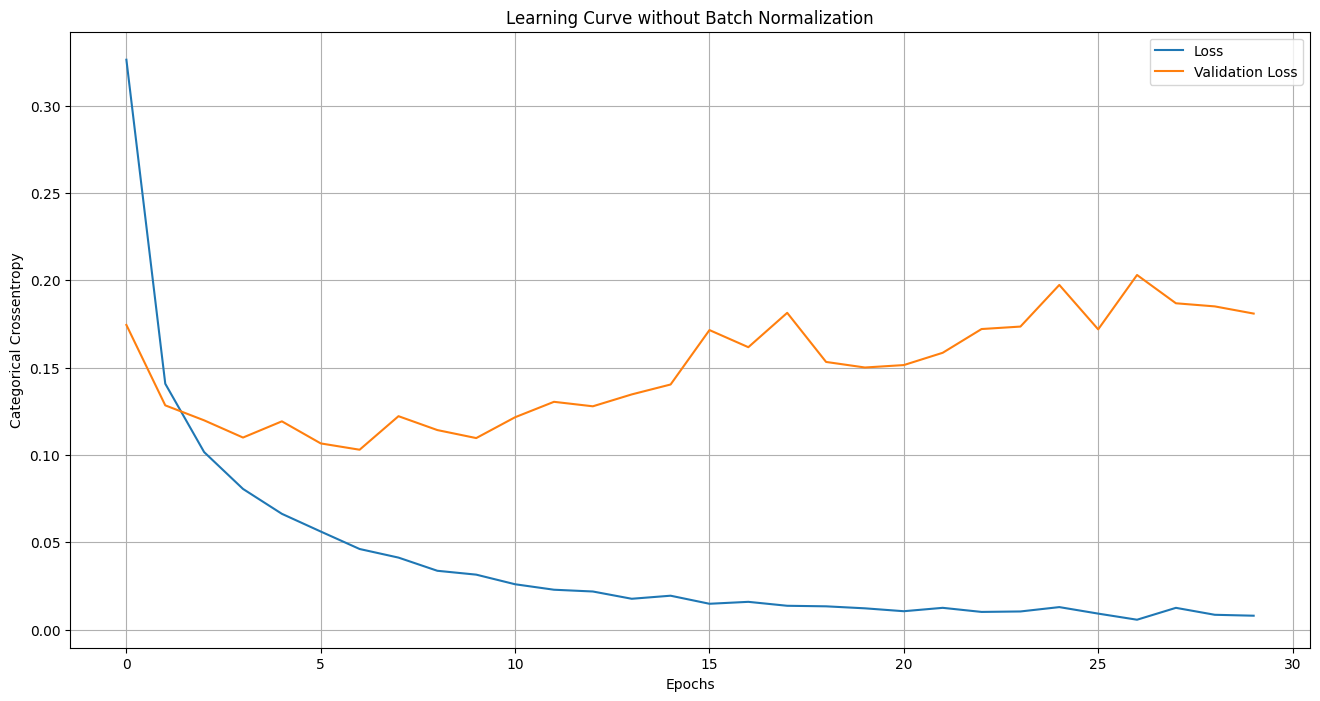

In [66]:
# ploting the learning curve for model without batch normalization
plt.figure(figsize=(16,8))
plt.plot(hist1.history['loss'],label='Loss')
plt.plot(hist1.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve without Batch Normalization')
plt.legend()
plt.grid()
plt.show()

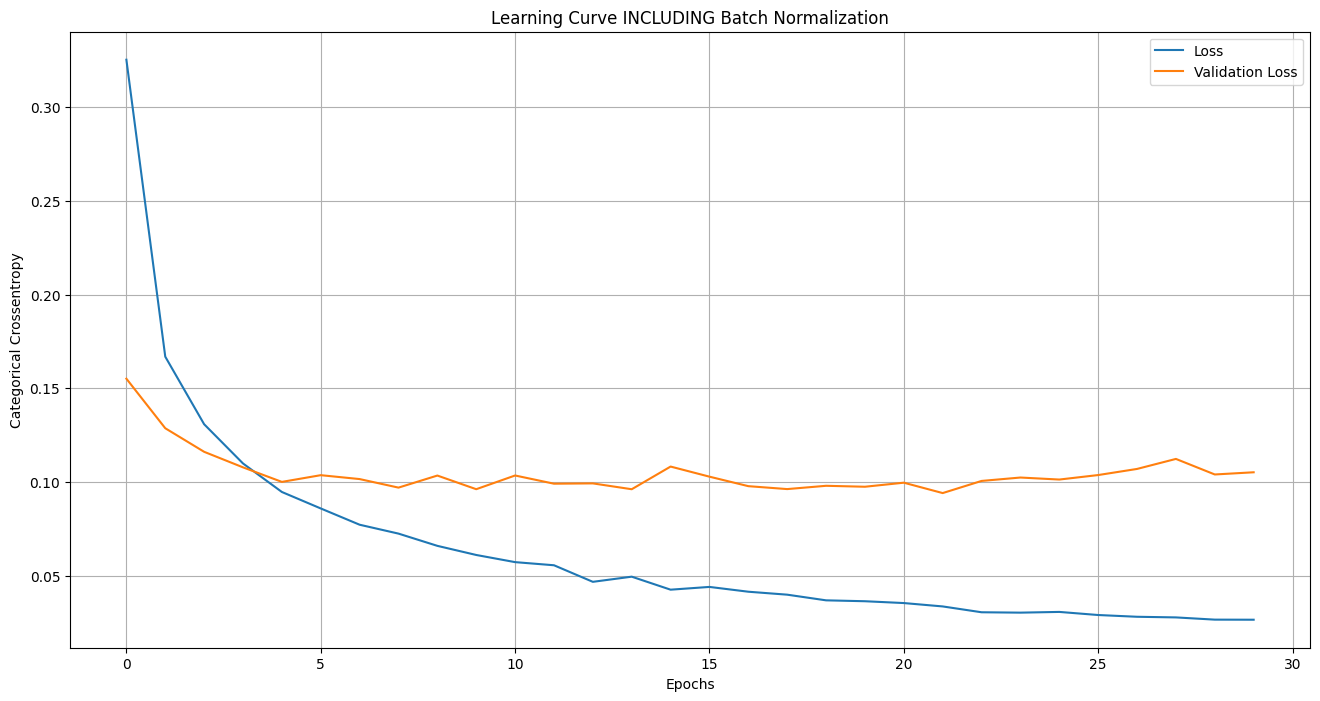

In [67]:
# plotting the learning curve for batch normalized model
plt.figure(figsize=(16,8))
plt.plot(hist2.history['loss'],label='Loss')
plt.plot(hist2.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve INCLUDING Batch Normalization')
plt.legend()
plt.grid()
plt.show()

In [68]:
# Evaluation in train and test for model without Batch Normalization
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0413 - accuracy: 0.9928


[0.0413026288151741, 0.9927666783332825]

In [69]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1521 - accuracy: 0.9732


[0.15206106007099152, 0.9732000231742859]

In [70]:
# Evaluation of Data for model with Batch Normalization
model2.evaluate(x_train,y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0281 - accuracy: 0.9930


[0.028087345883250237, 0.9929999709129333]

In [71]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0980 - accuracy: 0.9758


[0.09802792966365814, 0.9757999777793884]

Q.6 Discuss the impact of batch normalization on the training process and the performance of the neural network

In [72]:
# Reduced Overfitting : By Observing the Learning Curve it is clear that Batch Normalization reduces the overfitting of data
# Imporved Accuracy : Accuracy of Batch Normalization is better than model without batch normalization
# Increased Training Time: Time required to train neural network with Batch Normalization increases

In [73]:
yprob_test = model2.predict(x_test)
yprob_test[0:3]

313/313 [==============================] - 1s 2ms/step


array([[8.03014544e-08, 5.26760395e-08, 1.81567856e-07, 2.66481191e-04,
        1.56549720e-06, 1.85125216e-04, 6.20757978e-09, 9.99478042e-01,
        2.53645726e-06, 6.58628633e-05],
       [1.02264466e-05, 6.36733617e-08, 9.99973714e-01, 2.03052730e-09,
        7.14518245e-12, 2.09586810e-11, 1.58356161e-05, 1.25407641e-14,
        1.43851285e-11, 1.00478029e-11],
       [1.54058577e-09, 9.99992549e-01, 1.64600891e-07, 2.35770425e-09,
        1.85249746e-07, 4.04567047e-09, 1.65324957e-06, 1.86719404e-07,
        5.14491148e-06, 7.08986758e-10]], dtype=float32)

In [74]:
import numpy as np
ypred_test = np.argmax(yprob_test,axis=1)
ypred_test[0:3]

array([7, 2, 1])

In [75]:
y_test_label = np.argmax(y_test,axis=1)
y_test_label[0:3]

array([7, 2, 1])

In [76]:
lb = np.unique(y_test_label)
lb

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

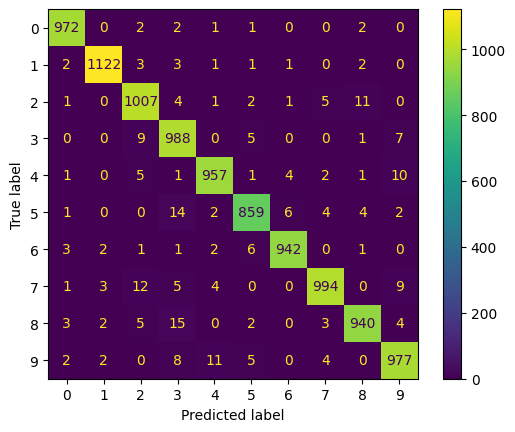

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(y_test_label,ypred_test)
cfd = ConfusionMatrixDisplay(cf,display_labels=lb)
cfd.plot()
plt.show()

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test_label,ypred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.96      0.97       892
           6       0.99      0.98      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Q.1 Experiment with different batch sizes and observe the effect on the training dynamics and model performance.

In [79]:
def plot_learning_curve(hist, batch_size):
    plt.figure(figsize=(16,8))
    plt.plot(hist.history['loss'],label='Loss')
    plt.plot(hist.history['val_loss'],label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Categorical Crossentropy')
    plt.title(f'Learning curve with Batch Size = {batch_size}')
    plt.legend()
    plt.grid()
    plt.show()

Training for batch size = 8


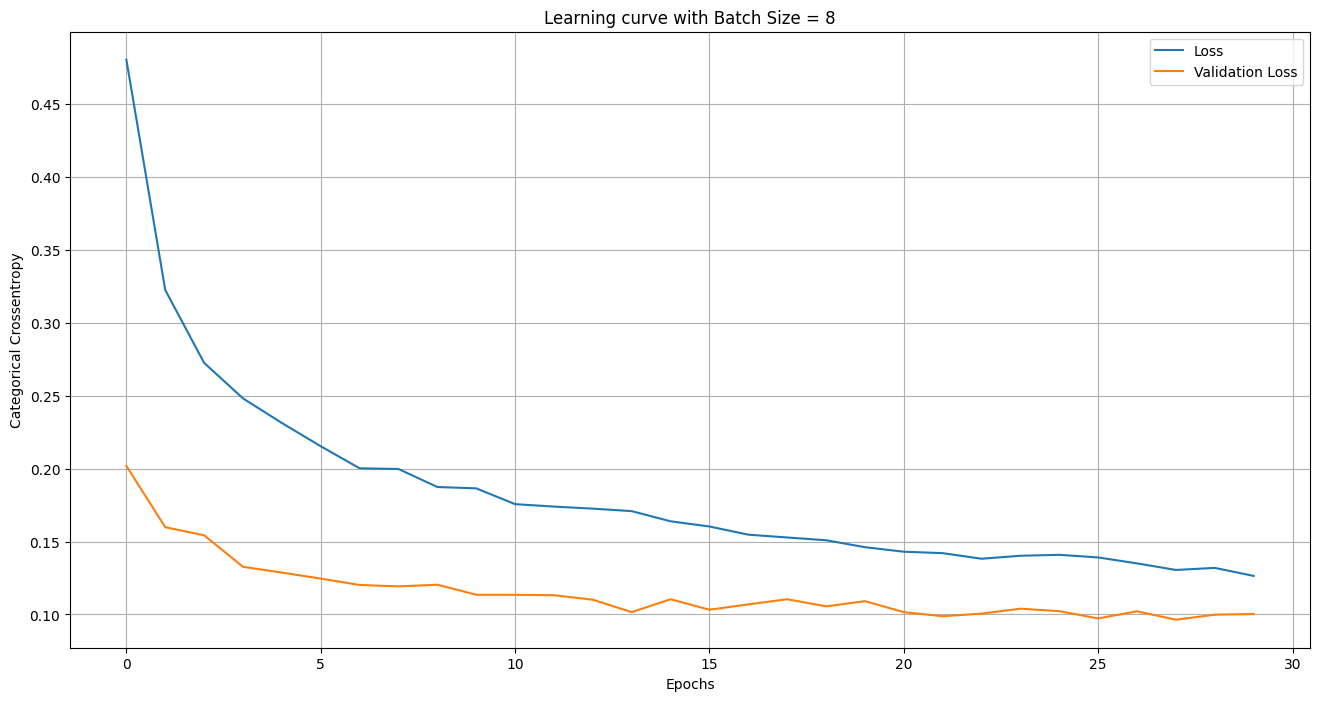

313/313 [==============================] - 1s 3ms/step - loss: 0.0991 - accuracy: 0.9720


Training for batch size = 16


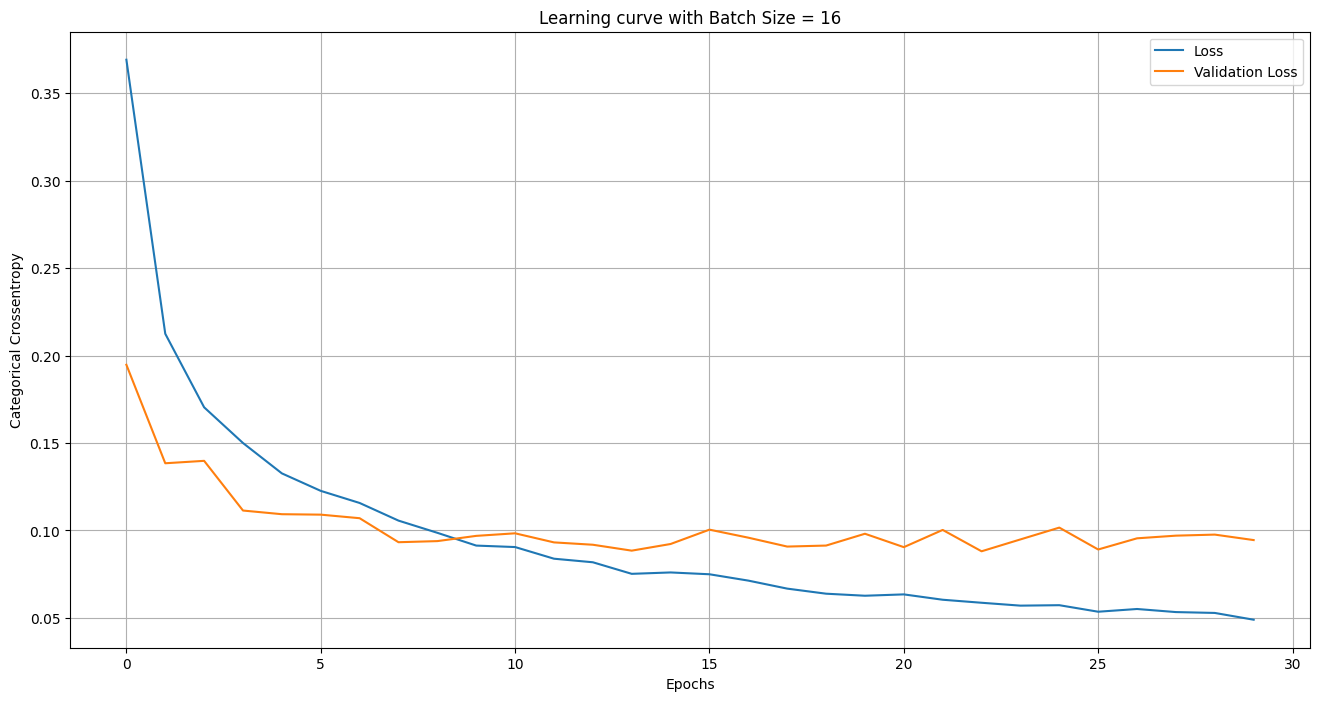

313/313 [==============================] - 1s 2ms/step - loss: 0.0877 - accuracy: 0.9764


Training for batch size = 32


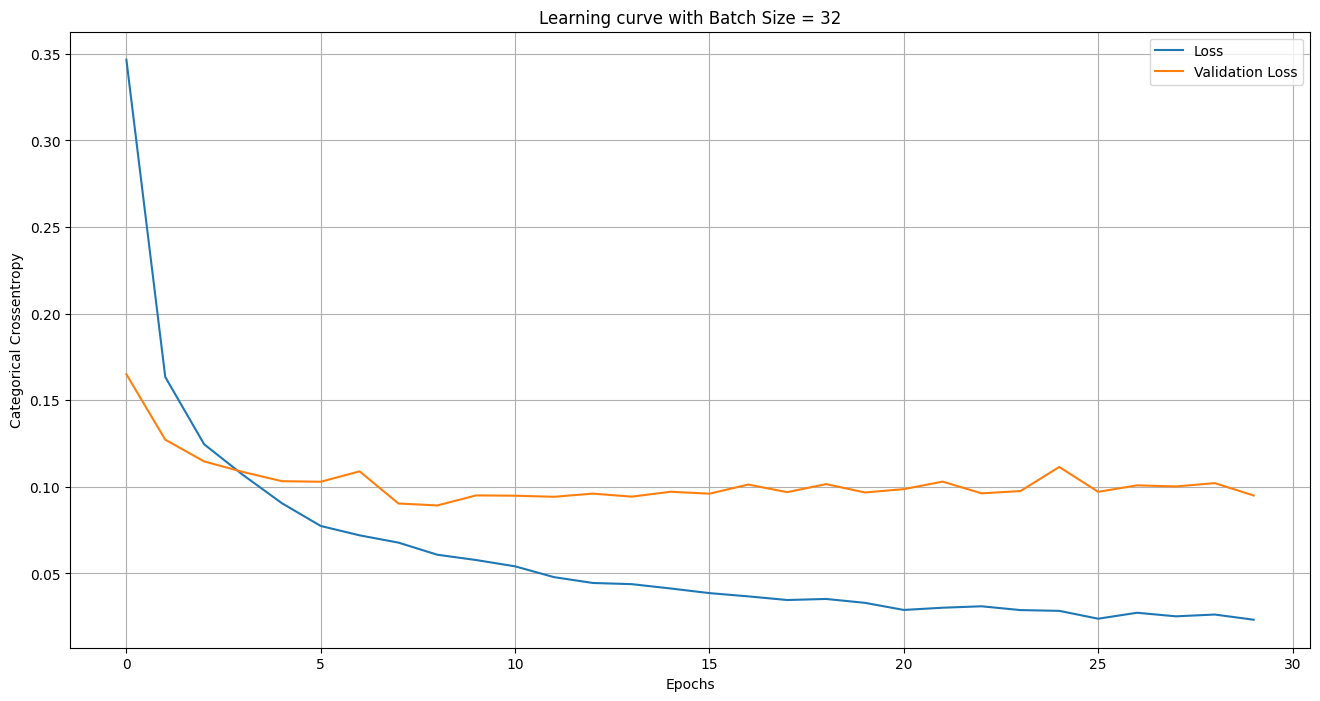

313/313 [==============================] - 1s 2ms/step - loss: 0.0919 - accuracy: 0.9779


Training for batch size = 64


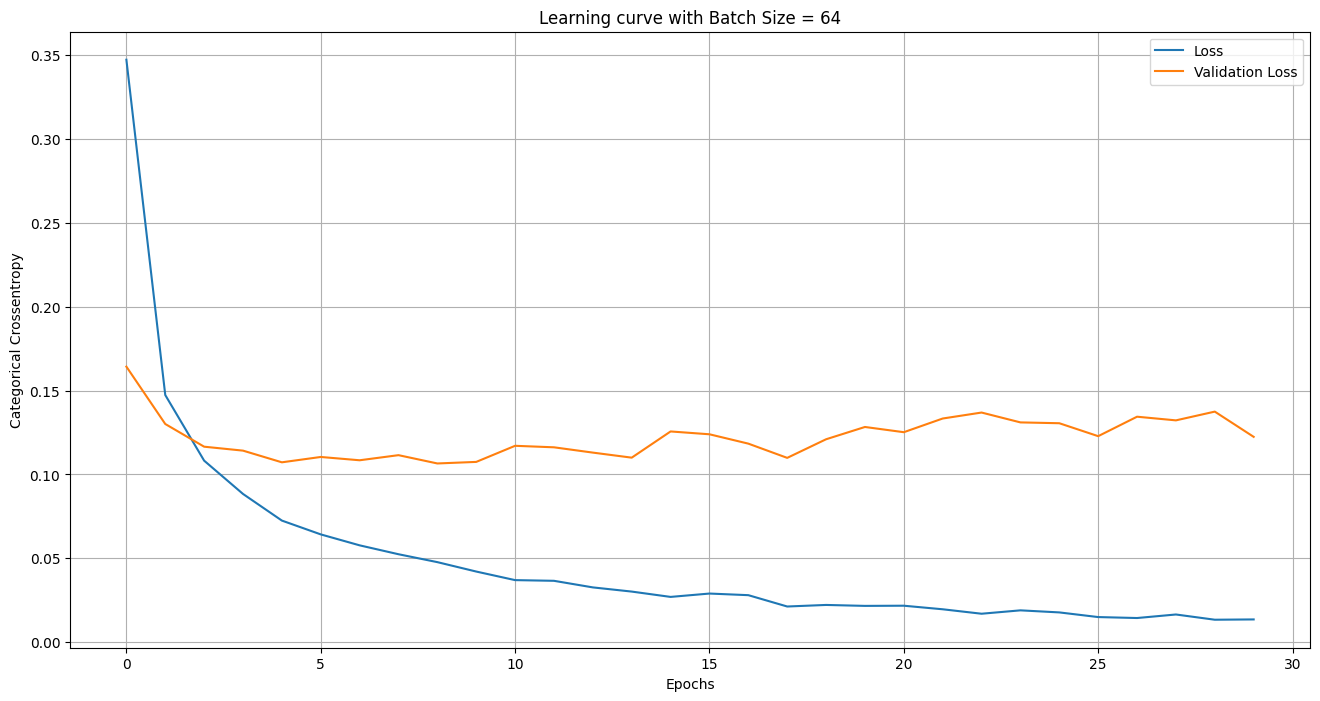

313/313 [==============================] - 1s 2ms/step - loss: 0.1038 - accuracy: 0.9748


Training for batch size = 128


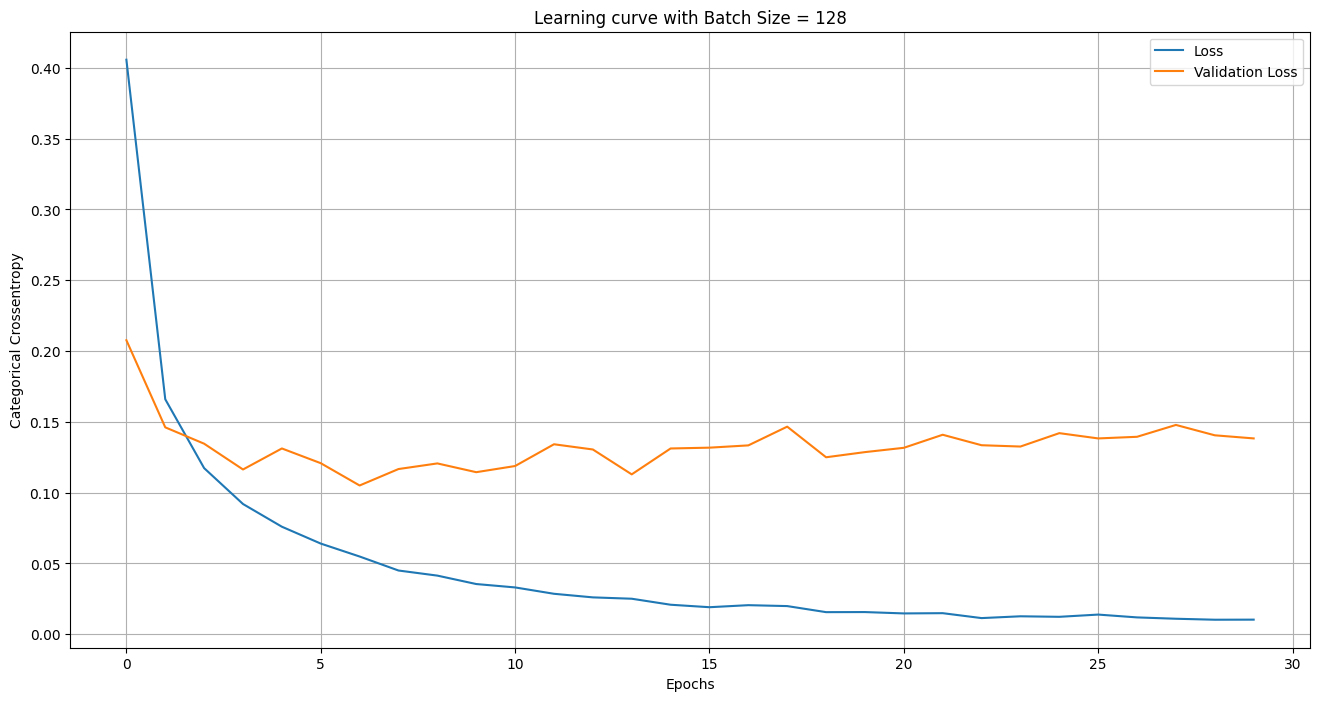

313/313 [==============================] - 1s 2ms/step - loss: 0.1162 - accuracy: 0.9733


Training for batch size = 256


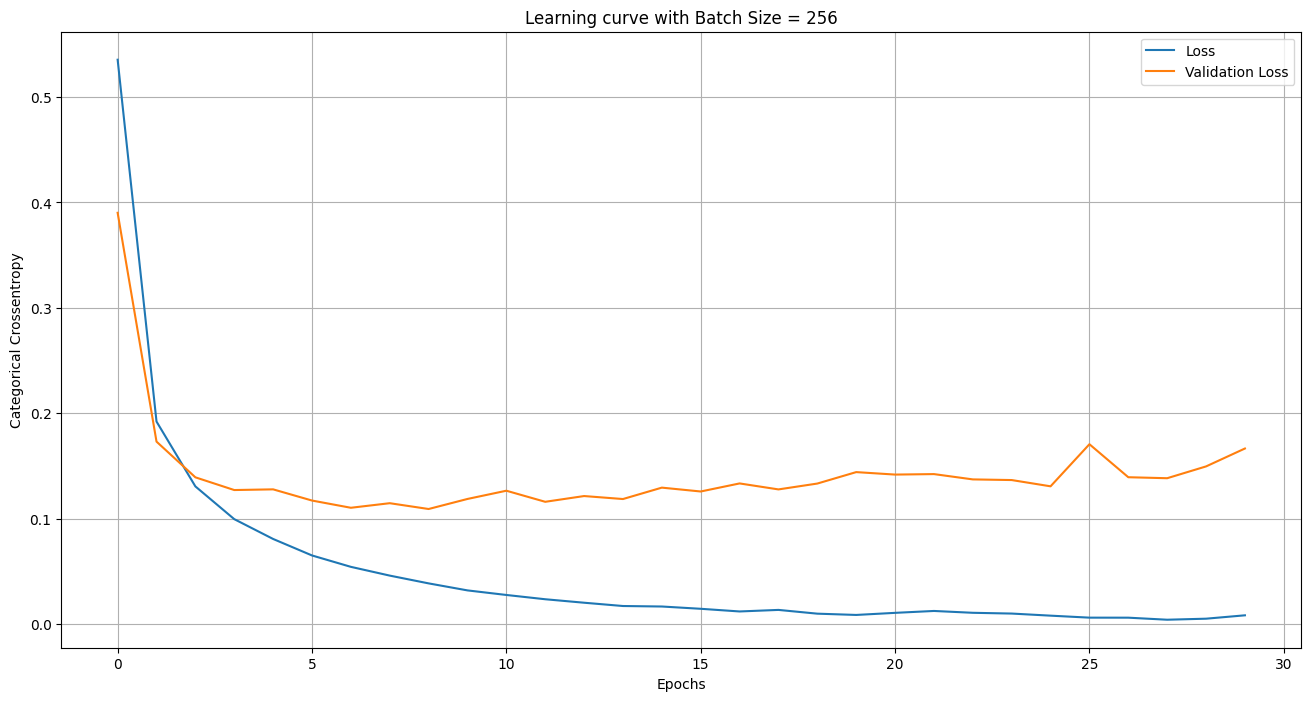

313/313 [==============================] - 1s 2ms/step - loss: 0.1441 - accuracy: 0.9676


Training for batch size = 512


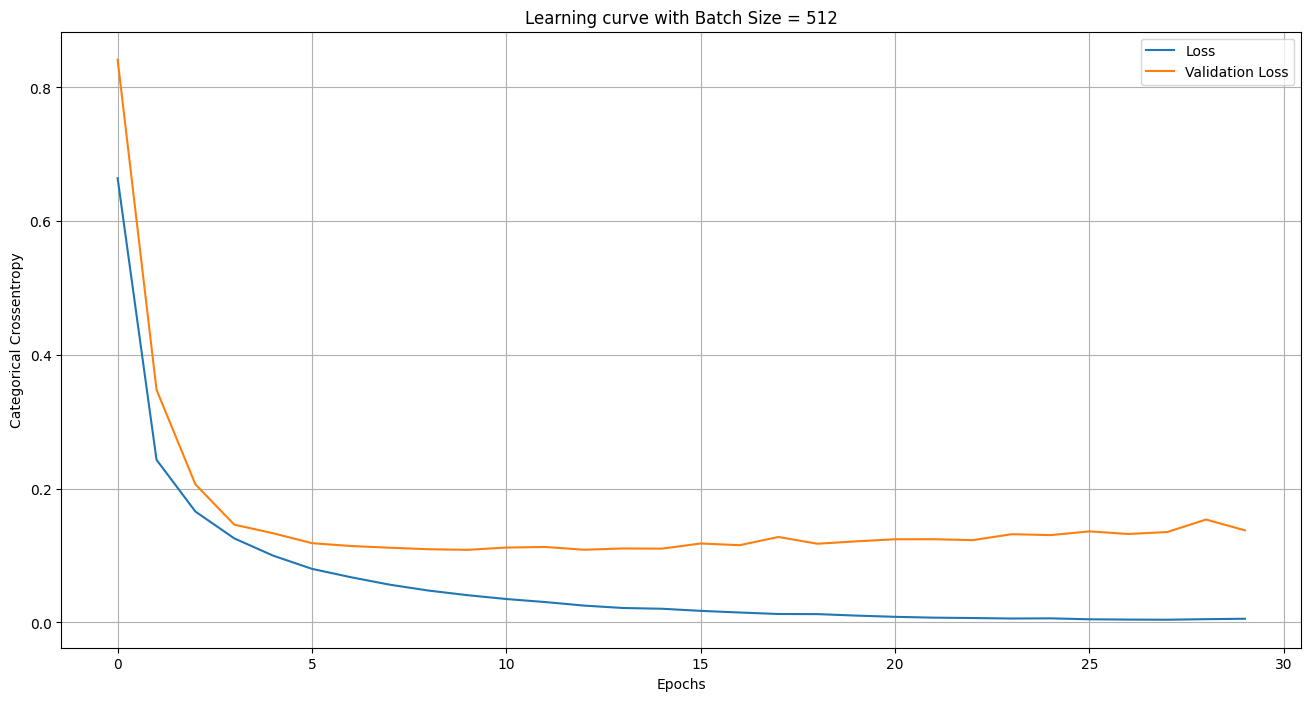

313/313 [==============================] - 1s 2ms/step - loss: 0.1282 - accuracy: 0.9684


Training for batch size = 1024


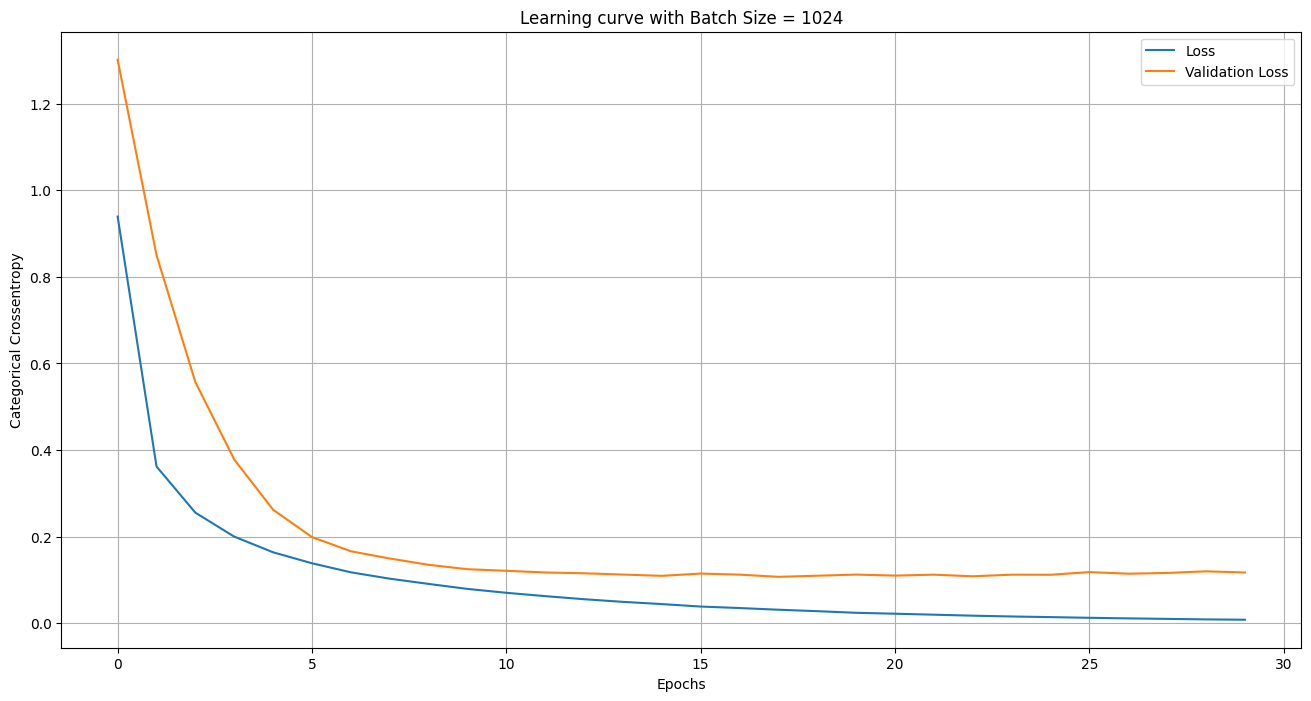

313/313 [==============================] - 1s 3ms/step - loss: 0.1150 - accuracy: 0.9691




In [80]:
sizes = [8,16,32,64,128,256,512,1024]
for i in sizes:
    print(f'Training for batch size = {i}')
    # Build Model
    nn = Sequential()
    nn.add(Flatten(input_shape=(28,28,1)))
    nn.add(Dense(64,activation='relu'))
    nn.add(BatchNormalization())
    nn.add(Dense(32,activation='relu'))
    nn.add(BatchNormalization())
    nn.add(Dense(10,activation='softmax'))
    # Compile model
    nn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    # Fit the model
    histn = nn.fit(x_train,y_train,validation_split=0.2,batch_size=i,epochs=30,verbose=0)
    # Plot learning curve
    plot_learning_curve(histn,i)
    nn.evaluate(x_train,y_train)
    nn.evaluate(x_test,y_test)
    print('\n---------------------------------------------------------------------------------------------------------\n')



Q.2 Discuss the advantage and potential limitations of batch normalization in improving training of neural networks


Batch Normalization (BatchNorm) is a technique used to train neural networks more effectively. Here's a simple explanation of its advantages and potential limitations:

Advantages of Batch Normalization:

Faster Training: BatchNorm helps neural networks learn faster by making sure the inputs to each layer are in a consistent and stable range. This speeds up the convergence of the network during training.

Stabilizes Learning: It prevents the network from becoming too sensitive to the initial random weights and biases. This means you're less likely to get stuck in training, even when using deep networks.

Regularization Effect: BatchNorm acts as a form of regularization by adding a small amount of noise to the network during training, which helps prevent overfitting. This means your network is less likely to perform well on the training data but poorly on new, unseen data.

Allows Higher Learning Rates: It enables the use of higher learning rates during training, which can make the network converge to a good solution faster.

Potential Limitations of Batch Normalization:

Performance During Inference: While BatchNorm is great during training, it may not be as effective during inference (when you use the trained model for predictions). This is because it relies on statistics computed during training, and those statistics may not be representative of the real-world data your model encounters.

Memory and Computational Overhead: BatchNorm requires storing and computing statistics for each batch of data, which can increase memory usage and slow down inference if you're working with resource-constrained devices.

Not Always Necessary: BatchNorm may not be needed for all types of neural networks or tasks. For simpler networks or certain applications, the benefits might not outweigh the added complexity it brings.

Doesn't Solve Everything: While BatchNorm helps with some training issues, it doesn't address all possible challenges in neural network training. You may still need to experiment with other techniques or architectures to achieve the best results for your specific problem.

Limitations of Batch Normalization:

Dependency on Mini-Batch Size: The effectiveness of batch normalization can be influenced by the mini-batch size. Extremely small mini-batches may result in noisy estimates of the mean and variance, leading to suboptimal normalization. However, larger mini-batch sizes can also introduce computational overhead.

Impact on Training Time and Memory: Batch normalization requires additional computations during training, which can increase the overall training time. Additionally, it requires storing and updating the mean and variance values for each layer, leading to higher memory requirements.

Inference Dependency on Statistics: During inference (prediction), the statistics used for normalization are typically based on the training data. This can lead to discrepancies if the statistical properties of the training and inference data significantly differ. Techniques like running averages or batch renormalization can be used to address this limitation.

Non-Robustness to Extreme Values: Batch normalization assumes a Gaussian distribution of the input data. In the presence of extreme values or outliers, it may not perform optimally. Techniques like layer normalization or group normalization may be more suitable in such cases.